In [1]:
%matplotlib notebook
import tomotools
import os

## Read in data from MRC file
- Converts to TomoStack, a sub-class of HyperSpy's Signal2D
- A GUI-based file selection option will be provided

Tilts found in metadata


VBox(children=(HBox(children=(Label(value='Tilt', layout=Layout(width='15%')), IntSlider(value=0, description='index', max=78), BoundedFloatText(value=0.0, continuous_update=True, description='value', max=78.02687072753906, min=-77.99752807617188, step=2.0003128051757812), Label(value='degrees', layout=Layout(width='5%')))), Checkbox(value=True, description='Continous update')))

<IPython.core.display.Javascript object>


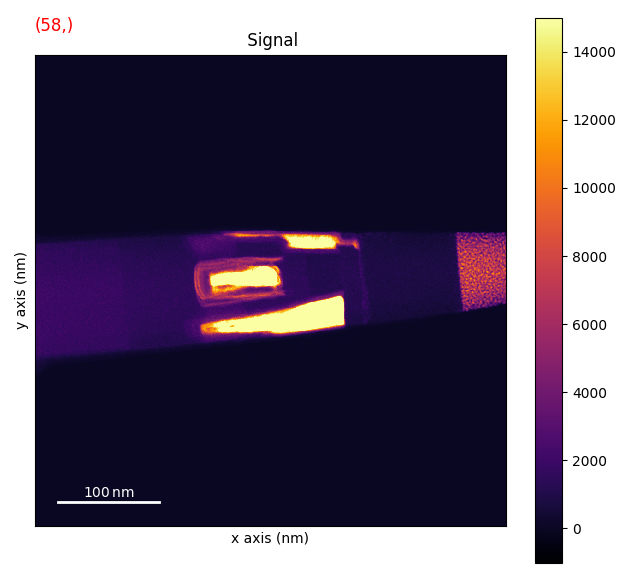

In [6]:
datapath = os.environ['ONEDRIVE'] + '\\Code\\Test Data\\Intel Tomo'
filename = '1_HAADF.mrc'
os.chdir(datapath)
haadf = tomotools.load(filename,reader='hspy')
haadf.plot(navigator='slider',cmap='inferno',vmin=-1000,vmax=15000)

## Rebin full stack for better SNR
- Not necessary but speeds up the entire processing pipeline

In [7]:
rebin = haadf.rebin(scale=(1,2,2))

## Spatially register the image stack 
- Using enhanced correlation coefficient algorithm as implemented in OpenCV

100%|██████████████████████████████████████████| 39/39 [00:00<00:00, 41.58it/s]


Spatial registration by ECC complete


VBox(children=(HBox(children=(Label(value='Tilt', layout=Layout(width='15%')), IntSlider(value=0, description='index', max=78), BoundedFloatText(value=-77.99752807617188, continuous_update=True, description='value', max=78.02687072753906, min=-77.99752807617188, step=2.0003128051757812), Label(value='degrees', layout=Layout(width='5%')))), Checkbox(value=True, description='Continous update')))

<IPython.core.display.Javascript object>


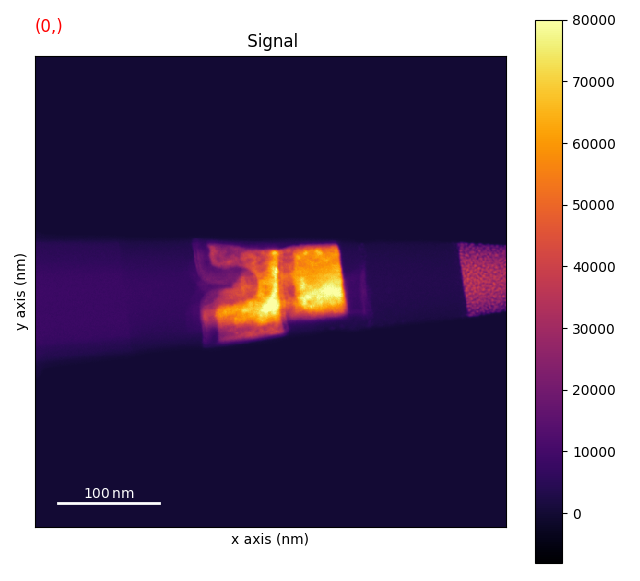

In [8]:
reg = rebin.stackRegister('ECC')
reg.plot(navigator='slider',cmap='inferno',vmin=-8000,vmax=80000)

## Align the tilt axis and lateral shift
- Minimizes reconstruction artifacts
- Based on tracking the center of mass (CoM) of the needle
- An image from the stack will be displayed.  The user chooses three points along the needle axis
- It is best to choose locations that are in a single phase slice of the data


Correcting tilt axis....
Iteration #1
Calculated tilt correction is: -4.79488485863
Calculated shift value is: -24.3164694285
Iteration #2
Calculated tilt correction is: 0.0788002215366
Calculated shift value is: 21.4649457175
Iteration #3
Calculated tilt correction is: 0.000340381639883
Calculated shift value is: -0.441091972497

Tilt axis alignment complete


VBox(children=(HBox(children=(Label(value='Tilt', layout=Layout(width='15%')), IntSlider(value=0, description='index', max=78), BoundedFloatText(value=-77.99752807617188, continuous_update=True, description='value', max=78.02687072753906, min=-77.99752807617188, step=2.0003128051757812), Label(value='degrees', layout=Layout(width='5%')))), Checkbox(value=True, description='Continous update')))

<IPython.core.display.Javascript object>


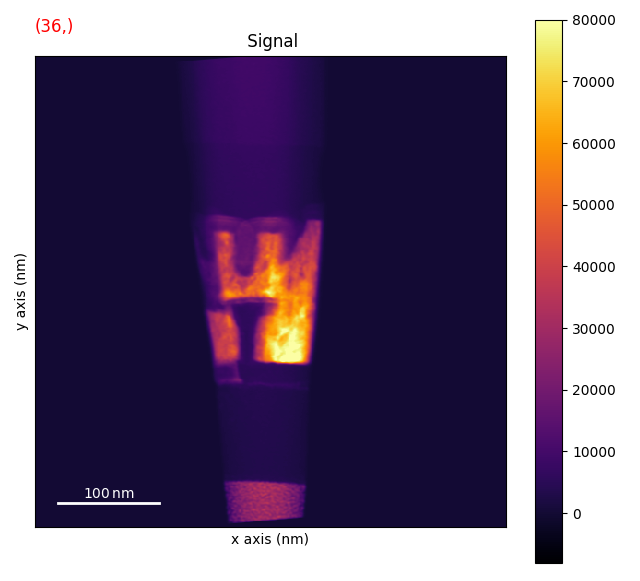

In [9]:
ali = reg.tiltAlign('CoM',locs=[100,200,400])
ali.plot(navigator='slider',cmap='inferno',vmin=-8000,vmax=80000)

## Reconstruct the data using weighted-backprojection. 
- Full dataset reconstructed

In [6]:
recWBP = ali.reconstruct(method='astraWBP',thickness=300)

Reconstructing volume using CPU-based WBP in the Astra Toolbox


100%|████████████████████████████████████████| 512/512 [02:48<00:00,  3.04it/s]


Reconstruction complete


VBox(children=(HBox(children=(Label(value='y', layout=Layout(width='15%')), IntSlider(value=0, description='index', max=511), BoundedFloatText(value=0.0, continuous_update=True, description='value', max=464.76200443734683, step=0.9095146857873715), Label(value='nm', layout=Layout(width='5%')))), Checkbox(value=True, description='Continous update')))

<IPython.core.display.Javascript object>


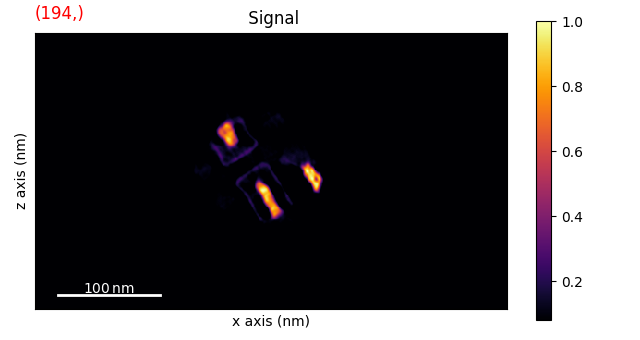

In [7]:
(recWBP/recWBP.max(1).max(1)).plot(navigator='slider',cmap='inferno',vmin=0.08)

## Reconstruct the data using simulataneous iterative reconstruction technique (SIRT). 
- In this case, only ten slices are from the middle of the stack to speed things up.
- 150 iterations
- Apply a positivity constraint

In [10]:
recSIRT50 = ali.isig[:,250:260].reconstruct(method='astraSIRT',thickness=300,iterations=150,constrain=True)

Reconstructing volume using CPU-based SIRT in the Astra Toolbox


100%|██████████████████████████████████████████| 10/10 [15:47<00:00, 94.75s/it]


Reconstruction complete


<IPython.core.display.Javascript object>


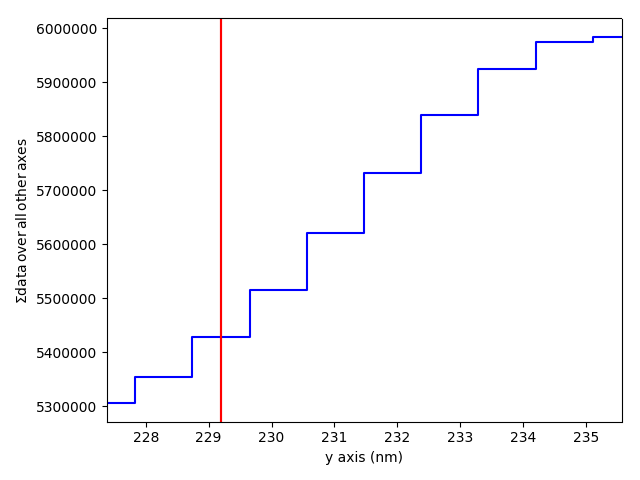

<IPython.core.display.Javascript object>


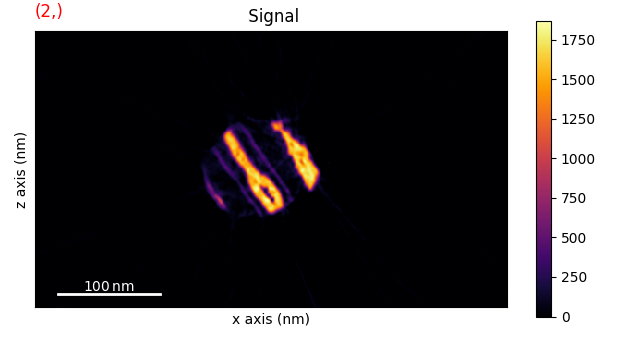

In [18]:
recSIRT50.plot(cmap='inferno')

## Reconstruct the entire dataset SIRT
- 150 iterations
- Apply a positivity constraint

In [8]:
recSIRT50Full = ali.reconstruct(method='astraSIRT',thickness=300,iterations=150,constrain=True)

Reconstructing volume using CPU-based SIRT in the Astra Toolbox


100%|█████████████████████████████████████| 512/512 [13:30:01<00:00, 94.93s/it]


Reconstruction complete


## Save the aligned dataset and the reconstruction. 
- Data saved using HyperSpy's I/O functionality
- Compressed HDF5 format
- All metadata stored with data

In [12]:
ali.save('1_HAADF_Aligned.hdf5',compression='gzip')
recWBP.save('1_HAADF_WBP.hdf5',compression='gzip')
recSIRT50.save('1_HAADF_SIRT50_10Slices.hdf5',compression='gzip')
recSIRT50Full.save('1_HAADF_SIRT50_Full.hdf5',compression='gzip')

Overwrite '1_HAADF_SIRT50_10Slices.hdf5' (y/n)?
y


## Read in stored data for visualization.
- Swap axes to navigate in different orientations



In [10]:
rec = tomotools.load('1_HAADF_SIRT50_Full.hdf5')

Tilts found in metadata


VBox(children=(HBox(children=(Label(value='Tilt', layout=Layout(width='15%')), IntSlider(value=297, description='index', max=511), BoundedFloatText(value=516.0953750610352, continuous_update=True, description='value', max=944.1623153686523, min=-77.99752807617188, step=2.0003128051757812), Label(value='degrees', layout=Layout(width='5%')))), Checkbox(value=True, description='Continous update')))

<IPython.core.display.Javascript object>


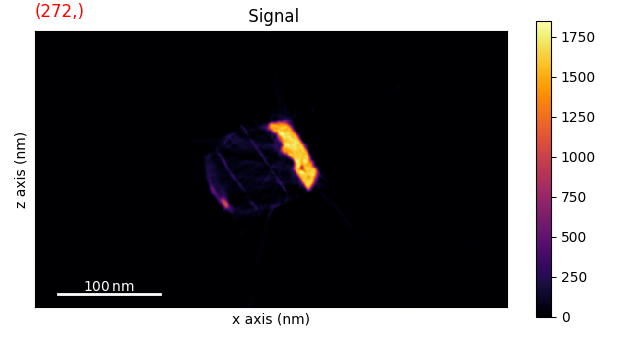

VBox(children=(HBox(children=(Label(value='x', layout=Layout(width='15%')), IntSlider(value=0, description='index', max=173), BoundedFloatText(value=127.33205601023201, continuous_update=True, description='value', max=284.6780966514473, min=127.33205601023201, step=0.9095146857873715), Label(value='nm', layout=Layout(width='5%')))), Checkbox(value=True, description='Continous update')))

<IPython.core.display.Javascript object>


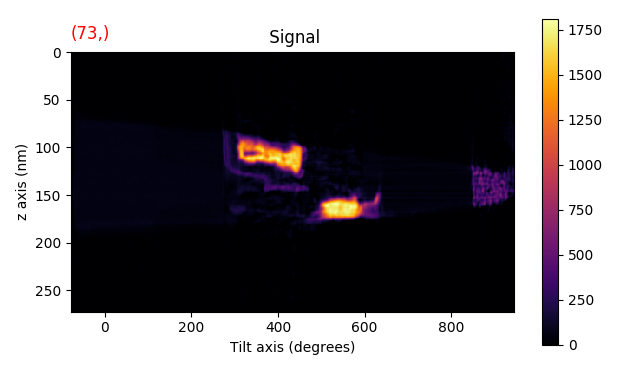

In [13]:
rec.plot(navigator='slider',cmap='inferno')
rec.swap_axes(0,1).inav[140:314].plot(navigator='slider',cmap='inferno')